In [49]:
import pandas as pd
import numpy as np

df  = pd.read_json('../data/Sarcasm_Headlines_Dataset.json', lines=True)
df2 = pd.read_json('../data/Sarcasm_Headlines_Dataset_v2.json', lines=True)

df = pd.concat([df, df2])
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [51]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

# Data visualisation
Boxplot

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)


In [53]:
df['sito'] = df.article_link.apply(lambda x: x.split('/')[2].split('.')[1])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sito'] = le.fit_transform(df['sito'])

le.classes_

array(['huffingtonpost', 'theonion'], dtype=object)

theonion è un sito di articoli sarcastici, huffingtonpost al contrario non lo è.

In [54]:
(df.is_sarcastic == df.sito).all()

True

In [55]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re, string

In [56]:
sw = stopwords.words('english')
sw.remove('not')
lemm = WordNetLemmatizer()

def text_cleaning(x):
    
    x = x.lower()
    x = re.sub('\s+\n+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = x.split()
    
    x = [lemm.lemmatize(word, "v") for word in x if not word in sw]
    x = ' '.join(x)
    
    return x

In [57]:
df['text_clean'] = df.headline.apply(lambda x: text_cleaning(x))
df['sentence_length'] = df.text_clean.apply(lambda x: len(x.split()))
df.head()

,article_link,headline,is_sarcastic,sito,text_clean,sentence_length
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,0,former versace store clerk sue secret black co...,10
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,0,roseanne revival catch thorny political mood b...,8
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,1,mom start fear son web series closest thing gr...,9
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,1,boehner want wife listen not come alternative ...,10
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,0,j k rowling wish snape happy birthday magical way,9


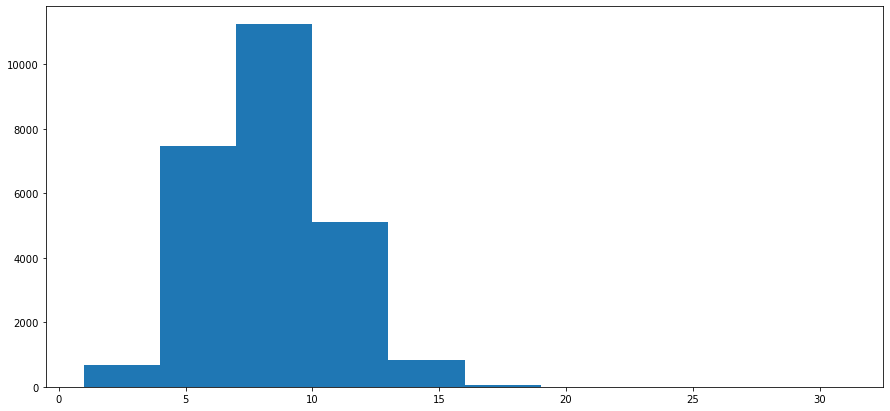

In [64]:
df.drop(df[df.sentence_length > 70].index, axis = 0, inplace=True) # 
plt.hist(df[df.is_sarcastic == 1].sentence_length)
plt.show()

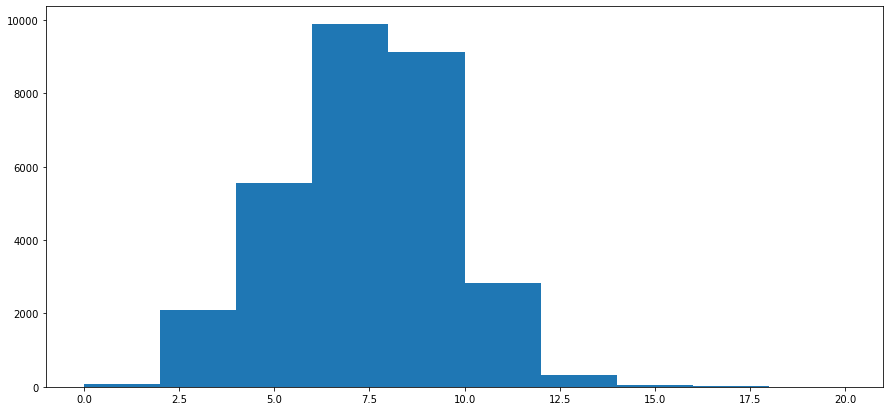

In [63]:
plt.hist(df[df.is_sarcastic == 0].sentence_length)
plt.show()

In [38]:
df = df[['headline', 'text_clean','sentence_length','is_sarcastic']]
df.head()

,headline,text_clean,sentence_length,is_sarcastic
0,former versace store clerk sues over secret 'b...,former versace store clerk sue secret black co...,10,0
1,the 'roseanne' revival catches up to our thorn...,roseanne revival catch thorny political mood b...,8,0
2,mom starting to fear son's web series closest ...,mom start fear son web series closest thing gr...,9,1
3,"boehner just wants wife to listen, not come up...",boehner want wife listen not come alternative ...,10,1
4,j.k. rowling wishes snape happy birthday in th...,j k rowling wish snape happy birthday magical way,9,0


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer(tokenizer=word_tokenize, min_df=10, max_df=0.60, dtype=np.int32)
X = tfidf.fit_transform(df.text_clean)

X_df = pd.DataFrame(X.todense(), columns=sorted(tfidf.vocabulary_))
X_df.head()

,0,000,1,10,100,10th,11,12,120,13,...,youths,youtube,z,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.reset_index(inplace=True, drop=True)
X_df.reset_index(inplace=True, drop=True)

df2 = pd.concat([df, X_df], axis = 1)
df2.head()

,headline,text_clean,sentence_length,is_sarcastic,0,000,1,10,100,10th,...,youths,youtube,z,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
0,former versace store clerk sues over secret 'b...,former versace store clerk sue secret black co...,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,the 'roseanne' revival catches up to our thorn...,roseanne revival catch thorny political mood b...,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mom starting to fear son's web series closest ...,mom start fear son web series closest thing gr...,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"boehner just wants wife to listen, not come up...",boehner want wife listen not come alternative ...,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,j.k. rowling wishes snape happy birthday in th...,j k rowling wish snape happy birthday magical way,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split

X = df2.loc[:, df2.columns != 'is_sarcastic']
y = df2.loc[:, 'is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train['sentence_length'] = mms.fit_transform(X_train.sentence_length.to_numpy().reshape(-1, 1))

In [44]:
X_train.iloc[:, 2:]

,sentence_length,0,000,1,10,100,10th,11,12,120,...,youths,youtube,z,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
27159,0.290323,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45056,0.322581,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49034,0.322581,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0.290323,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21750,0.225806,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0.258065,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54343,0.225806,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0.387097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0.225806,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train.iloc[:, 2:], y_train)


RandomForestClassifier()

In [46]:
X_test.sentence_length = mms.transform(X_test.sentence_length.to_numpy().reshape(-1, 1))
pred = model.predict(X_test.iloc[:, 2:])
accuracy_score(y_test, pred)

0.9190536173941618

In [47]:
# save the model
import pickle
path = '..\\model\\'
filename = 'sarcasm_model.sav'
with open(path+filename, 'wb') as f:
    pickle.dump(model, f)